In [16]:
import pandas as pd
news=pd.read_table('r8-train-all-terms.txt',header=None,names = ["Class", "Text"])
news.head(10) 
# head() only shows the first 5 sets. head(3) for 3.
# this dataset looks like when thru some form of stemming and removal of numbers and symbols. 

,Class,Text
0,earn,champion products ch approves stock split cham...
1,acq,computer terminal systems cpml completes sale ...
2,earn,cobanco inc cbco year net shr cts vs dlrs net ...
3,earn,am international inc am nd qtr jan oper shr lo...
4,earn,brown forman inc bfd th qtr net shr one dlr vs...
5,earn,dean foods df sees strong th qtr earnings dean...
6,earn,brown forman bfdb sets stock split ups payout ...
7,earn,esquire radio and electronics inc ee th qtr sh...
8,earn,united presidential corp upco th qtr net shr c...
9,earn,owens and minor inc obod raises qtly dividend ...


In [4]:
%config IPCompleter.greedy=True

In [13]:
#Summarize the data by the news class
news.groupby('Class').describe()

Text                                                               
         count unique                                                top freq
Class                                                                        
acq       1596   1591  nippon life seeking tie with u s securities ho...    2
crude      253    245  reagan says u s needs to lessen oil imports pr...    2
earn      2840   2835  kasler corp kasl st qtr jan net shr profit thr...    2
grain       41     41  u s grain carloadings fall in week u s grain c...    1
interest   190    176  fed adds reserves via customer repurchases the...    3
money-fx   206    195  sumita says bank will intervene if necessary b...    3
ship       108    105  agency reports ships waiting at panama canal t...    3
trade      251    239  baldrige predicts end of u s japan trade dispu...    2

In [27]:
#Select a subset from the dataframe. (crude money-fx trade)
subnews=news[(news.Class=="trade")| (news.Class=='crude')|(news.Class=='money-fx') | (news.Class=='grain') ]

In [28]:
subnews.groupby('Class').describe()

Text                                                               
         count unique                                                top freq
Class                                                                        
crude      253    245  reagan says u s needs to lessen oil imports pr...    2
grain       41     41  u s grain carloadings fall in week u s grain c...    1
money-fx   206    195  sumita says bank will intervene if necessary b...    3
trade      251    239  baldrige predicts end of u s japan trade dispu...    2

In [29]:
print(subnews.shape)

(751, 2)


In [30]:
#Count the length of each document
length=subnews['Text'].apply(len)
subnews=subnews.assign(Length=length)
subnews.head()

,Class,Text,Length
15,trade,brazil anti inflation plan limps to anniversar...,1134
40,grain,u s grain carloadings fall in week u s grain c...,381
43,crude,diamond shamrock dia cuts crude prices diamond...,532
49,grain,gao likely to show certs more costly than cash...,1488
55,crude,opec may have to meet to firm prices analysts ...,2558


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AFDD145CC0>,
      dtype=object)

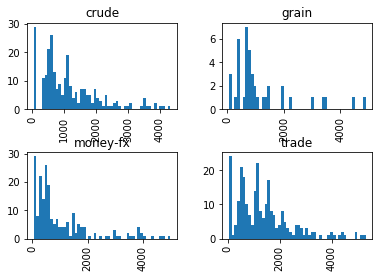

In [33]:
#Plot the distribution of the document length for each category
import matplotlib.pyplot as plt
subnews.hist(column='Length',by='Class',bins=50)

In [35]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [36]:
subnews.head()

,Class,Text,Length
15,trade,brazil anti inflation plan limps to anniversar...,1134
40,grain,u s grain carloadings fall in week u s grain c...,381
43,crude,diamond shamrock dia cuts crude prices diamond...,532
49,grain,gao likely to show certs more costly than cash...,1488
55,crude,opec may have to meet to firm prices analysts ...,2558


In [37]:
#Define preprocessing function

import nltk
from nltk.corpus import stopwords
newstopwords=stopwords.words("English") + ['yuhao','the','is','it','may']
WNlemma = nltk.WordNetLemmatizer()


def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens=[WNlemma.lemmatize(t) for t in tokens]
    tokens=[word for word in tokens if word not in newstopwords]
    text_after_process=" ".join(tokens)
    return(text_after_process)

In [39]:
#Apply the function on each document
subnews['Text'] = subnews['Text'].apply(pre_process)


In [40]:
subnews.head()

,Class,Text,Length
15,trade,brazil anti inflation plan limp anniversary in...,1134
40,grain,u grain carloadings fall week u grain carloadi...,381
43,crude,diamond shamrock dia cut crude price diamond s...,532
49,grain,gao likely show cert costly cash study grain c...,1488
55,crude,opec meet firm price analyst opec forced meet ...,2558


In [41]:
length=subnews['Text'].apply(len)
subnews=subnews.assign(Length=length)

In [42]:
subnews.head()

,Class,Text,Length
15,trade,brazil anti inflation plan limp anniversary in...,839
40,grain,u grain carloadings fall week u grain carloadi...,279
43,crude,diamond shamrock dia cut crude price diamond s...,410
49,grain,gao likely show cert costly cash study grain c...,1068
55,crude,opec meet firm price analyst opec forced meet ...,1793


In [43]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(subnews.Text, subnews.Class, test_size=0.33, random_state=12)

In [44]:
#Create dtm by using word occurence

from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer( )

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(503, 6531)

In [45]:
count_vect.get_feature_names()

['aam',
 'ab',
 'abal',
 'abandon',
 'abdel',
 'abdelaziz',
 'abdul',
 'abdulaziz',
 'abdullah',
 'abide',
 'abiding',
 'ability',
 'able',
 'abolish',
 'abolished',
 'abroad',
 'abrupt',
 'absence',
 'absolutely',
 'absorb',
 'abu',
 'abundant',
 'abuse',
 'abusing',
 'acccounts',
 'accelerate',
 'accelerated',
 'accelerating',
 'accentuating',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accession',
 'accident',
 'acclerated',
 'accommodating',
 'accomodations',
 'accompanying',
 'accomplished',
 'accomplishment',
 'accord',
 'accordance',
 'according',
 'account',
 'accountable',
 'accounted',
 'accounting',
 'accrued',
 'accumulation',
 'accusation',
 'accused',
 'accusing',
 'achieve',
 'achieved',
 'achieves',
 'achieving',
 'acid',
 'acknowledged',
 'acknowledging',
 'acquah',
 'acquire',
 'acquiring',
 'acquisition',
 'acre',
 'acreage',
 'acrimony',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'activation',
 'active',
 'actively',
 'activity',
 'actual',
 'actual

In [46]:
dtm1 = pd.DataFrame(X_train_counts.toarray().transpose(), index = count_vect.get_feature_names())
dtm1=dtm1.transpose()
dtm1.head()
dtm1.to_csv('dtm1.csv',sep=',')
# create a classifation model , build doc term matrix

# Building a Naïve Bayes Model

In [47]:
#Create dtm by using Term Frequency. 
#Divide the number of occurrences of each word in a document 
#by the total number of words in the document: 
#these new features are called tf for Term Frequencies
#If set use_idf=True, which mean create dtm by using tf_idf

from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(503, 6531)

In [48]:
#Building Modeling by using Naïve Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf, y_train)

In [49]:
#Prediction on new documents
docs_new = ['Crude price is dropping ', 'rate is increasing']

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tf_transformer.transform(X_new_counts)
#X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)
print(predicted)

['crude' 'money-fx']


In [50]:
#Build a pipeline: Combine multiple steps into one
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),  
                     ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
                    ])

In [51]:
#Use pipeline to train the model
text_clf.fit(X_train,y_train ) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [52]:
#Test model accuracy
import numpy as np
from sklearn import metrics 
predicted = text_clf.predict(X_test)
#np.mean(predicted == y_test) 
print(metrics.confusion_matrix(y_test, predicted))
print(np.mean(predicted == y_test) )

[[86  0  0  4]
 [ 1  0  0 15]
 [ 1  0 59 10]
 [ 0  0  0 72]]
0.875


# Building a Decision Tree Model

In [53]:
#Decision Tree

from sklearn import tree
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                      ('clf', tree.DecisionTreeClassifier())
                    ])
text_clf.fit(X_train, y_train) 
predicted = text_clf.predict(X_test)

print(metrics.confusion_matrix(y_test, predicted))
print(np.mean(predicted == y_test) )

[[85  0  4  1]
 [ 0 14  1  1]
 [ 0  0 64  6]
 [ 0  0  5 67]]
0.9274193548387096


# Building a SVM Model

In [54]:
#SVM
from sklearn import svm
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                      ('clf', svm.LinearSVC(C=1.0))
                    ])

In [55]:
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [56]:
predicted = text_clf.predict(X_test)
 
print(metrics.confusion_matrix(y_test, predicted))
print(np.mean(predicted == y_test) )
#y_test.value_counts()

[[90  0  0  0]
 [ 0 13  1  2]
 [ 0  0 68  2]
 [ 0  0  1 71]]
0.9758064516129032


In [57]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

      crude       1.00      1.00      1.00        90
      grain       1.00      0.81      0.90        16
   money-fx       0.97      0.97      0.97        70
      trade       0.95      0.99      0.97        72

avg / total       0.98      0.98      0.98       248



In [58]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[78  1  0]
 [ 0 74  6]
 [ 1  1 74]]


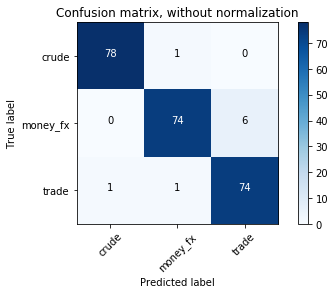

<Figure size 432x288 with 0 Axes>

In [35]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
cnf_matrix = confusion_matrix(y_test, predicted)
plot_confusion_matrix(cnf_matrix, classes=['crude','money_fx','trade'],
                      title='Confusion matrix, without normalization')
plt.figure()
plt.show()

# Introduce the GridSearch Method

In [59]:
from sklearn.model_selection import GridSearchCV
parameters = {
                  'tfidf__use_idf': (True, False),
                   'clf__C': (1, 0.5),
                }

#text_clf = Pipeline([('vect', CountVectorizer()),
#                    ('tfidf', TfidfTransformer(use_idf=True)),
#                      ('clf', SGDClassifier(
#                                            alpha=1e-3 
#                                             ))
#                    ])


In [61]:
# If we give this parameter a value of -1, 
#grid search will detect how many cores are installed and uses them all:

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__C: 1
tfidf__use_idf: True
